In [1]:
#Let's import the libraries and the data set we are going to use 
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt 
import seaborn as sns
nx_data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Exploring the Data # 

In [2]:
#How many records and columns do we have?
nx_data.shape

(8807, 12)

In [3]:
#The data type of each column and other important info
nx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#Showing a sample of different records in the data set 
nx_data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8083,s8084,TV Show,Star-Crossed,NaN,"Aimee Teegarden, Matt Lanter, Grey Damon, Male...",United States,"April 16, 2015",2014,TV-14,1 Season,"Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy",The passionate love between an alien boy and a...
2031,s2032,Movie,Cuties,Maïmouna Doucouré,"Fathia Youssouf, Médina El Aidi-Azouni, Esther...",France,"September 9, 2020",2020,TV-MA,96 min,"Dramas, International Movies",Eleven-year-old Amy starts to rebel against he...
5751,s5752,TV Show,DEATH NOTE,NaN,"Kappei Yamaguchi, Alessandro Juliani, Mamoru M...",Japan,"October 15, 2016",2006,TV-14,1 Season,"Anime Series, Crime TV Shows, International TV...",When a Japanese high schooler comes into posse...
6120,s6121,Movie,All the Boys Love Mandy Lane,Jonathan Levine,"Anson Mount, Edwin Hodge, Michael Welch, Brook...",United States,"July 3, 2018",2006,R,91 min,Horror Movies,During a weekend excursion to a secluded ranch...
334,s335,Movie,Five Feet Apart,Justin Baldoni,"Haley Lu Richardson, Cole Sprouse, Moisés Aria...",United States,"August 1, 2021",2019,PG-13,116 min,"Dramas, Romantic Movies",A teen with cystic fibrosis shakes up her dail...


--> looks like we have alot of NaN values

# So let's Clean the Data # 

In [5]:
#See if there is any dublicates in the title column specificly
nx_data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
#To know how many nan value in each column
nx_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#Replacing any nan value with something understandable
nx_data['director'].fillna('Unknown', inplace=True)
nx_data['cast'].fillna('Unknown', inplace=True)
nx_data['country'].fillna('Unknown', inplace=True)
nx_data['date_added'].fillna('Unknown', inplace=True)
nx_data['rating'].fillna('Unrated', inplace=True)
nx_data.head()

/tmp/ipykernel_17/2271814165.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nx_data['director'].fillna('Unknown', inplace=True)
/tmp/ipykernel_17/2271814165.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
#Convert datetime datatype to datetime format
nx_data['date_added'] = pd.to_datetime(nx_data['date_added'],errors='coerce')
nx_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
nx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# let's do Some awesome Visualization :) # 

In [10]:
nx_type = nx_data['type'].value_counts()
nx_type

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [11]:
sns.set(style='darkgrid')
nx_data['Show_Type'] =nx_data['type']

Text(0.5, 1.0, 'Movies vs Tv shows')

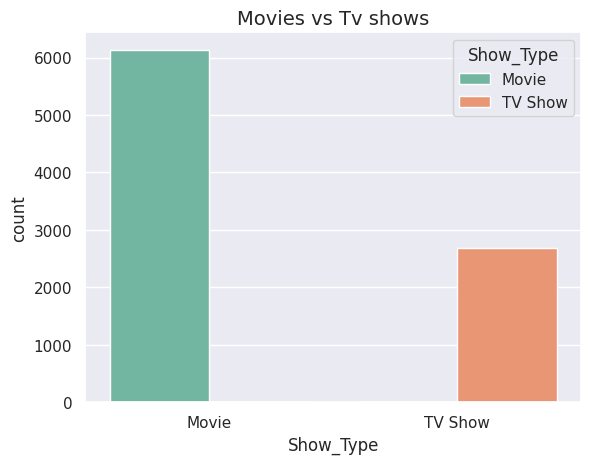

In [12]:
sns.countplot(x ='Show_Type',hue='Show_Type',palette='Set2',data=nx_data)
plt.title('Movies vs Tv shows', fontsize=14)

In [13]:
Top_genres =nx_data['listed_in'].str.split(', ').explode().value_counts().head(10)
Top_genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres on Netflix')

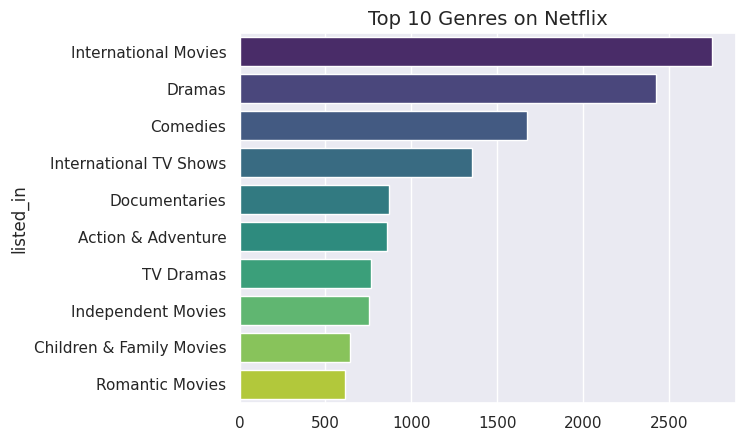

In [14]:
sns.barplot(x=Top_genres.values, y=Top_genres.index, palette="viridis")
plt.title('Top 10 Genres on Netflix', fontsize=14)

In [15]:
Top_Artists= nx_data['cast'].str.split(', ').explode().value_counts().head(10)
Top_Artists

cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Artists on Netflix')

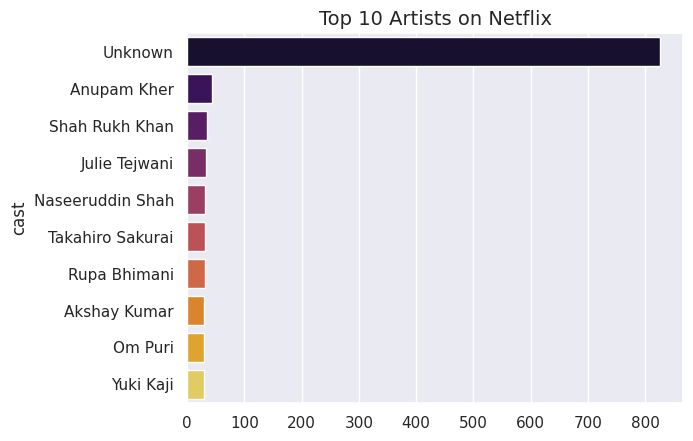

In [16]:
sns.barplot(x=Top_Artists.values, y=Top_Artists.index, palette="inferno")
plt.title('Top 10 Artists on Netflix', fontsize=14)

Iam as same as you don't know anyone of those hhhhh

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Release Years on Netflix')

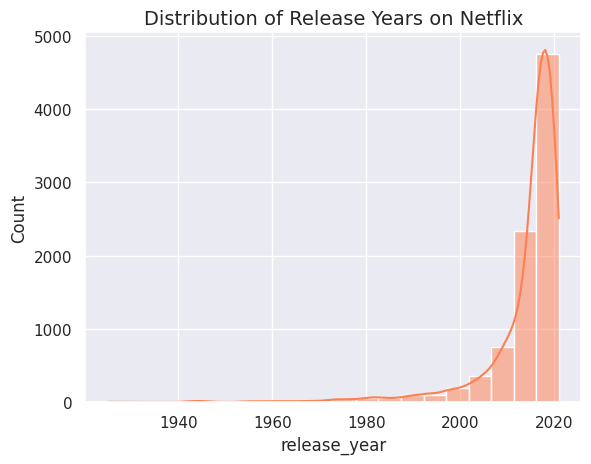

In [17]:
sns.histplot(nx_data['release_year'],bins=20, kde=True,fill=True, color="coral")

plt.title('Distribution of Release Years on Netflix', fontsize=14)